#ML Bootcamp: k-Nearest Neighbors

In this lab, we will provide an interactive demonstration of the k-Nearest Neighbors machine learning algorithm, predicting what number is represented by handwritten images of digits 0-9.



Let's first start by loading the data in. We will use the scikit-learn digits dataset as a reference. Each piece of data consists of a **representation** of a handwritten digit and a **label** corresponding to the number of the drawn digit.

In [1]:
import numpy as np  # imports a linear algebra package in python
from sklearn import datasets # imports datasets from ML package sklearn


digits = datasets.load_digits()
digits_X = digits.data  # input data
digits_y = digits.target # output data 

print(digits_X[2], digits_y[2])  # (x^3, y^3)
print(digits_X.shape)

[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.] 2
(1797, 64)


As discussed in lecture, the first important decision we have to make is how to **represent** the data we are given. It's not clear at first glance how we should convert a handwritten picture into a format we can apply machine learning on.

We view these images as 32x32 bitmaps (compressing the image if necessary). Today we will represent each image as a vector.  We construct the representation as follows. We divide the 32x32 bitmap into nonoverlapping blocks of 4x4. The number of "on" pixels are counted in each block (a number between 0 and 16 inclusive) and we combine the 64 numbers (one from each block) into a vector representation of the image.

Let's take a look. Below we can see the image and corresponding digit and vector representation of one of our data examples.

We represent the below image with the following vector if length 64: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

As you might be able to tell, the image is of the number 0

(8, 8)


<Figure size 432x288 with 0 Axes>

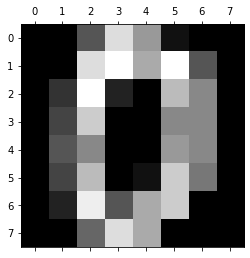

In [2]:
import matplotlib.pyplot as plt

print("We represent the below image with the following vector if length 64: " + str(digits_X[0]))
print("")
print("As you might be able to tell, the image is of the number " + str(digits_y[0]))
print("")

print(digits.images[0].shape)

plt.gray()
plt.matshow(digits.images[0]) 
plt.show()

In order to do machine learning, let's separate our data into a subset to **train** on and a subset to **test** on. 

*(You can vary with_ex to change the number of test examples)*

In [3]:
np.random.seed(0) # reproducible (sets random seed)
indices = np.random.permutation(len(digits_X))
print(indices)

# |with_ex| is the number of test examples
# Precondition: with_ex < 0
with_ex = -500

digits_X_train = digits_X[indices[:with_ex]]
digits_y_train = digits_y[indices[:with_ex]]


digits_X_test = digits_X[indices[with_ex:]]
digits_y_test = digits_y[indices[with_ex:]]

[1081 1707  927 ... 1653  559  684]


It's finally time to do some machine learning with the **k-Nearest-Neighbors classifier**. We have implemented the classifier from scratch so that you can see. 

We use 1-Nearest-Neighbor (1-NN) as an example. 

In 1-NN, we load in the train data to build our model. On the test data we pick a label to **minimize the loss** function of the distance between the vector representating our test point and the closest (in Euclidean distance) training point with that label.




Run the code below and compare the actual digit labels and the ones we predicted with our model.

**Exercise \[*]**: What is the accuracy of 1-NN on our test set?

In [4]:
def dist(x, y): return np.linalg.norm(x - y)

def knn(k=1):
  digits_labels_test = [] # creates empty list

  for test_ex in digits_X_test: # for every test example
      distances = []
      for i in range(len(digits_X_train)):
         distances.append((dist(digits_X_train[i], test_ex), # distance between training example and current test example
                           digits_y_train[i]) # corresponding label of training example
                         )
      distances.sort(key=lambda x : x[0])
      count_each = np.zeros(10)  
      for i in range(k): # for k nearest neighbors
        count_each[distances[i][1]] += 1 # increment count of labels by one
      y_hat = np.argmax(count_each) # returns most frequent index (i.e., most frequent label)
      digits_labels_test.append(y_hat) # populate empty labels list with prediction

  # now all the predictions have been made, want to compute accuracy
  wrong = 0
  for i in range(len(digits_y_test)):
     if digits_y_test[i] != digits_labels_test[i]:
        wrong +=1
  error_rate = float(wrong)/len(digits_y_test)
  accuracy = 1 - error_rate
  return accuracy

knn(1)


0.988

If you finish going through this notebook with time to spare, consider the following variations.

First, vary k to change for a more general k-NN classifier.

**Exercise \[\*\*]**: Is there any choice of with_ex so that picking k > 1 improves the accuracy over 1-NN?.


**Exercise \[\*\*]**: What loss function do we minimize to select test labels when k > 1?


**Exercise \[\*\*]**: Can you modify the code to predict labels for our test examples in a different way when k > 1 (but so that labels are chosen the same way when k = 1)?

**Exercise \[\*\*\*]**: Can you apply this algorithm to a different dataset? Consider for example the toy datasets [here](https://scikit-learn.org/stable/datasets/index.html). Report on your findings!




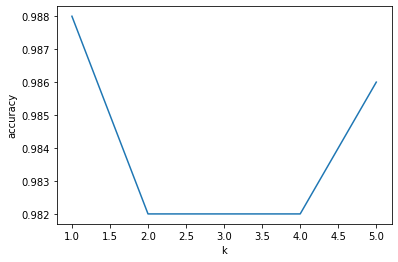

In [5]:
import matplotlib.pyplot as plt  # a plotting package

# a list of accuracies
accuracies = []

# for each k, compute the accuracy under k-NN
for k in range(1, 6):
  accuracies.append(knn(k))
  
# plot k versus accuracy
plt.plot(range(1, 6), accuracies)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()